In [ ]:
  import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
#K.set_image_data_format(‘channels_last’)
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow#
from keras.callbacks import ModelCheckpoint, EarlyStopping
import cv2


In [ ]:
pip install keras-segmentation

Final Model

In [ ]:
from keras_segmentation.pretrained import pspnet_50_ADE_20K

model = pspnet_50_ADE_20K()
from keras_segmentation.models.model_utils import transfer_weights
from keras_segmentation.pretrained import pspnet_50_ADE_20K
from keras_segmentation.models.pspnet import pspnet_50

pretrained_model = pspnet_50_ADE_20K()

new_model = pspnet_50( n_classes=5 )

transfer_weights( pretrained_model , new_model ) # transfer weights from pre-trained model to your model



187842560/187839752 [==============================] - 4s 0us/step


112it [00:00, 1108.84it/s]

Copying weights 


225it [00:00, 722.88it/s]

Copied weights of 120 layers and skipped 1 layers


In [ ]:
new_model.train(
    train_images =  "/content/drive/MyDrive/bl_sd_pd_noresize/train/orig",
    train_annotations = "/content/drive/MyDrive/bl_sd_pd_noresize/train/anno",
    epochs=9,
    validate=True,
    val_images="/content/drive/MyDrive/bl_sd_pd_noresize/validation/orig",
    val_annotations="/content/drive/MyDrive/bl_sd_pd_noresize/validation/anno"
)

Verifying training dataset


100%|██████████| 1456/1456 [18:22<00:00,  1.32it/s]


Dataset verified! 
Verifying validation dataset


100%|██████████| 14/14 [00:11<00:00,  1.25it/s]
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Dataset verified! 
Epoch 1/9
512/512 [==============================] - 657s 1s/step - loss: 1.5694 - accuracy: 0.3324 - val_loss: 0.3693 - val_accuracy: 0.9065
Epoch 2/9
512/512 [==============================] - 610s 1s/step - loss: 0.2459 - accuracy: 0.9568 - val_loss: 0.3411 - val_accuracy: 0.9070
Epoch 3/9
512/512 [==============================] - 611s 1s/step - loss: 0.1828 - accuracy: 0.9606 - val_loss: 0.2919 - val_accuracy: 0.9094
Epoch 4/9
512/512 [==============================] - 612s 1s/step - loss: 0.1501 - accuracy: 0.9641 - val_loss: 0.2937 - val_accuracy: 0.9103
Epoch 5/9
512/512 [==============================] - 608s 1s/step - loss: 0.1369 - accuracy: 0.9629 - val_loss: 0.2755 - val_accuracy: 0.9108
Epoch 6/9
512/512 [==============================] - 607s 1s/step - loss: 0.1241 - accuracy: 0.9647 - val_loss: 0.2677 - val_accuracy: 0.9118
Epoch 7/9
512/512 [==============================] - 607s 1s/step - loss: 0.1130 - accuracy: 0.9670 - val_loss: 0.2417 - val_accu

**Only broadleaves and sedges**

In [ ]:
#bd sl and pd
print(new_model.evaluate_segmentation( inp_images_dir="/content/drive/MyDrive/playment_bg_sd_only/validation/orig"  , annotations_dir="/content/drive/MyDrive/playment_bg_sd_only/validation/anno" ) )

6it [00:05,  1.11it/s]

{'frequency_weighted_IU': 0.9361118174687166, 'mean_IU': 0.3538167498771276, 'class_wise_IU': array([0.96364734, 0.57313533, 0.23230108, 0.        , 0.        ])}


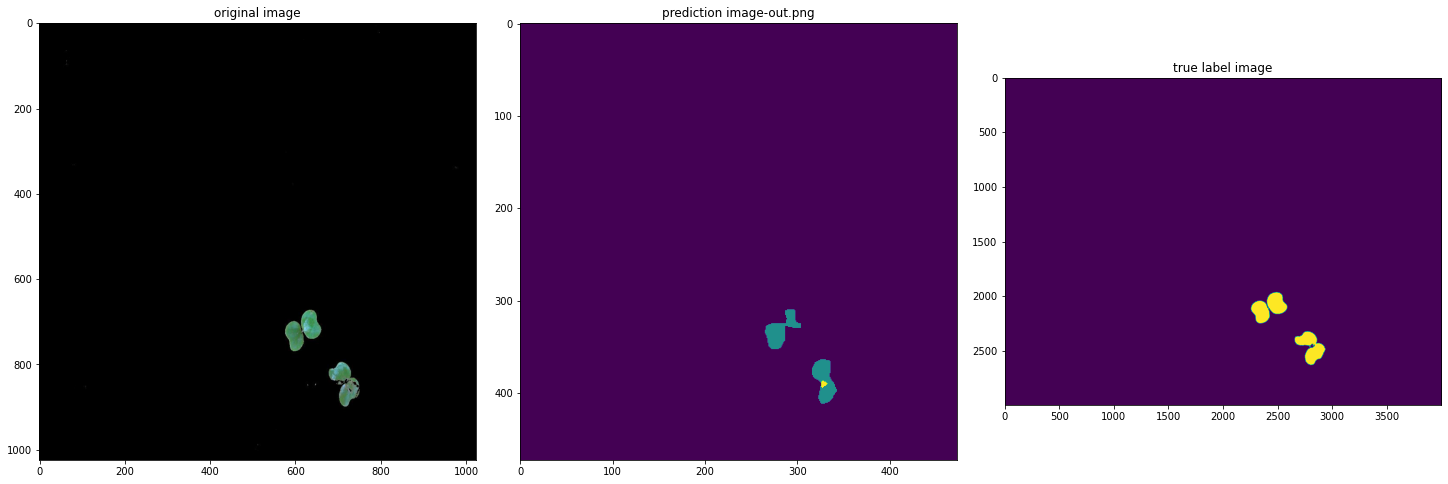

In [ ]:

##start = time.time()

input_image = "/content/drive/MyDrive/playment_bg_sd_only/validation/orig/DSC04180bl.jpg"
out = new_model.predict_segmentation(
    inp=input_image,
    out_fname="out3.png",overlay_img=True, show_legends=True,
    class_names = ["broadleaves","paddy","grass","sedges","background"]
)

fig, axs = plt.subplots(1, 3, figsize=(20, 20), constrained_layout=True)

img_orig = Image.open(input_image)
axs[0].imshow(img_orig)
axs[0].set_title('original image')
axs[0].grid(False)

axs[1].imshow(out)
axs[1].set_title('prediction image-out.png')
axs[1].grid(False)

validation_image = "/content/drive/MyDrive/playment_bg_sd_only/bl_sd_anno/DSC04180bl.png"
axs[2].imshow( Image.open(validation_image))
axs[2].set_title('true label image')
axs[2].grid(False)

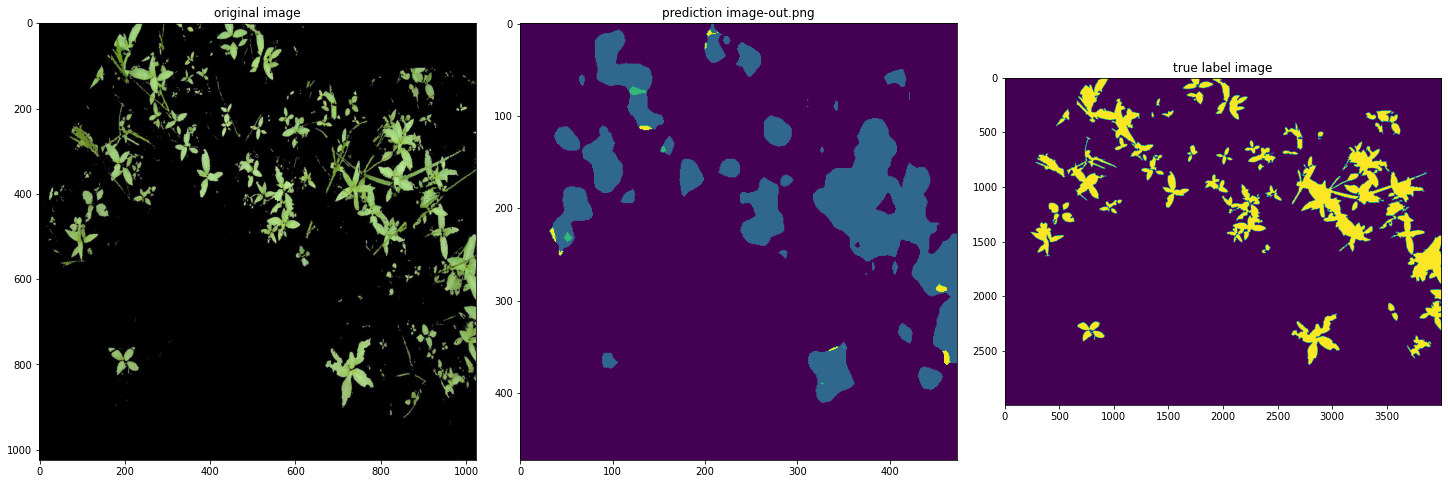

In [ ]:

##start = time.time()

input_image = "/content/drive/MyDrive/playment_bg_sd_only/validation/orig/DSC04342bl.jpg"
out = new_model.predict_segmentation(
    inp=input_image,
    out_fname="out4.png",overlay_img=True, show_legends=True,
    class_names = ["broadleaves","paddy","grass","sedges","background"]
)

fig, axs = plt.subplots(1, 3, figsize=(20, 20), constrained_layout=True)

img_orig = Image.open(input_image)
axs[0].imshow(img_orig)
axs[0].set_title('original image')
axs[0].grid(False)

axs[1].imshow(out)
axs[1].set_title('prediction image-out.png')
axs[1].grid(False)

validation_image = "/content/drive/MyDrive/playment_bg_sd_only/bl_sd_anno/DSC04342bl.png"
axs[2].imshow( Image.open(validation_image))
axs[2].set_title('true label image')
axs[2].grid(False)

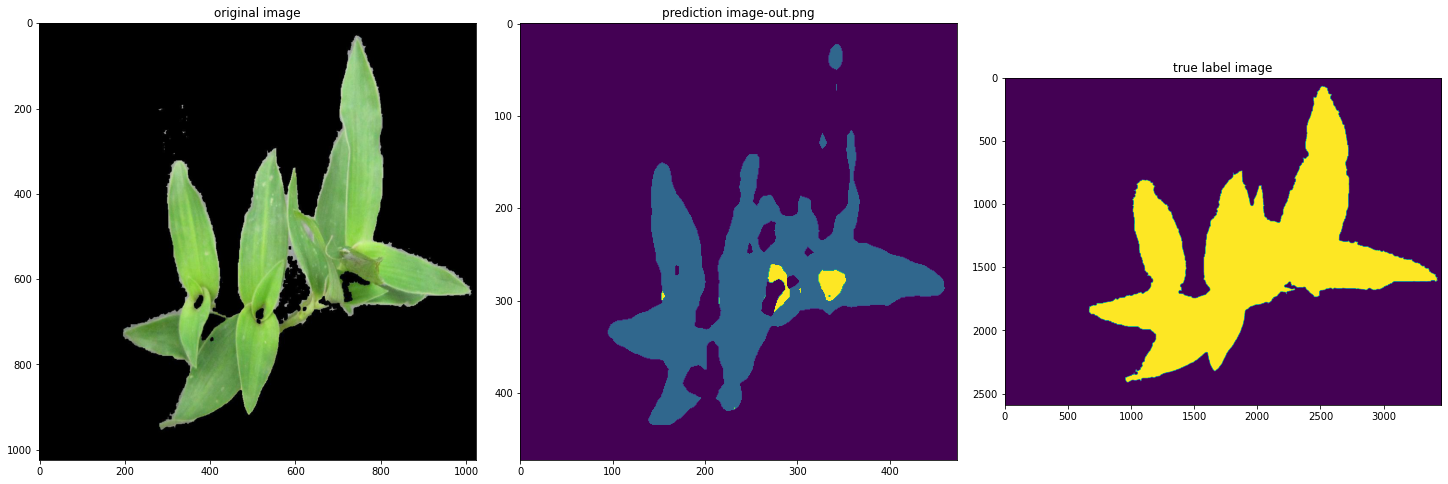

In [ ]:

##start = time.time()

input_image = "/content/drive/MyDrive/playment_bg_sd_only/validation/orig/IMG_2064bl.jpg"
out = new_model.predict_segmentation(
    inp=input_image,
    out_fname="out5.png",overlay_img=True, show_legends=True,
    class_names = ["broadleaves","paddy","grass","sedges","background"]
)

fig, axs = plt.subplots(1, 3, figsize=(20, 20), constrained_layout=True)

img_orig = Image.open(input_image)
axs[0].imshow(img_orig)
axs[0].set_title('original image')
axs[0].grid(False)

axs[1].imshow(out)
axs[1].set_title('prediction image-out.png')
axs[1].grid(False)

validation_image = "/content/drive/MyDrive/playment_bg_sd_only/bl_sd_anno/IMG_2064bl.png"
axs[2].imshow( Image.open(validation_image))
axs[2].set_title('true label image')
axs[2].grid(False)

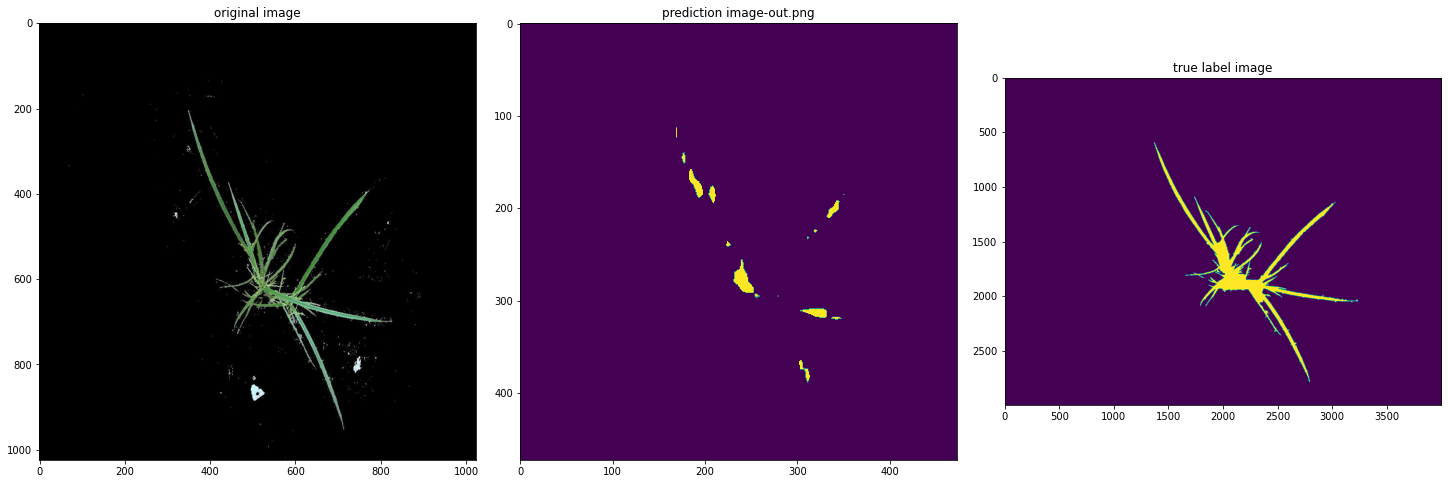

In [ ]:

##start = time.time()

input_image = "/content/drive/MyDrive/playment_bg_sd_only/validation/orig/DSC04090sd.jpg"
out = new_model.predict_segmentation(
    inp=input_image,
    out_fname="out2.png",overlay_img=True, show_legends=True,
    class_names = ["broadleaves","paddy","grass","sedges","background"]
)

fig, axs = plt.subplots(1, 3, figsize=(20, 20), constrained_layout=True)

img_orig = Image.open(input_image)
axs[0].imshow(img_orig)
axs[0].set_title('original image')
axs[0].grid(False)

axs[1].imshow(out)
axs[1].set_title('prediction image-out.png')
axs[1].grid(False)

validation_image = "/content/drive/MyDrive/playment_bg_sd_only/bl_sd_anno/DSC04090sd.png"
axs[2].imshow( Image.open(validation_image))
axs[2].set_title('true label image')
axs[2].grid(False)

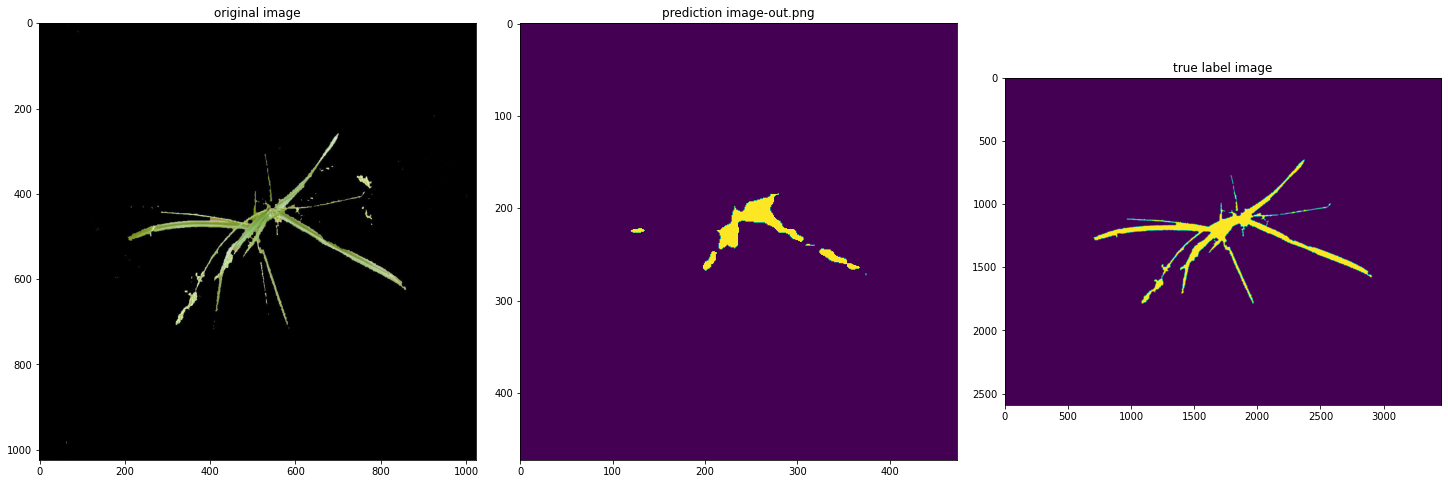

In [ ]:

##start = time.time()

input_image = "/content/drive/MyDrive/playment_bg_sd_only/validation/orig/IMG_4422sd.jpg"
out = new_model.predict_segmentation(
    inp=input_image,
    out_fname="out6.png",overlay_img=True, show_legends=True,
    class_names = ["broadleaves","paddy","grass","sedges","background"]
)

fig, axs = plt.subplots(1, 3, figsize=(20, 20), constrained_layout=True)

img_orig = Image.open(input_image)
axs[0].imshow(img_orig)
axs[0].set_title('original image')
axs[0].grid(False)

axs[1].imshow(out)
axs[1].set_title('prediction image-out.png')
axs[1].grid(False)

validation_image = "/content/drive/MyDrive/playment_bg_sd_only/bl_sd_anno/IMG_4422sd.png"
axs[2].imshow( Image.open(validation_image))
axs[2].set_title('true label image')
axs[2].grid(False)

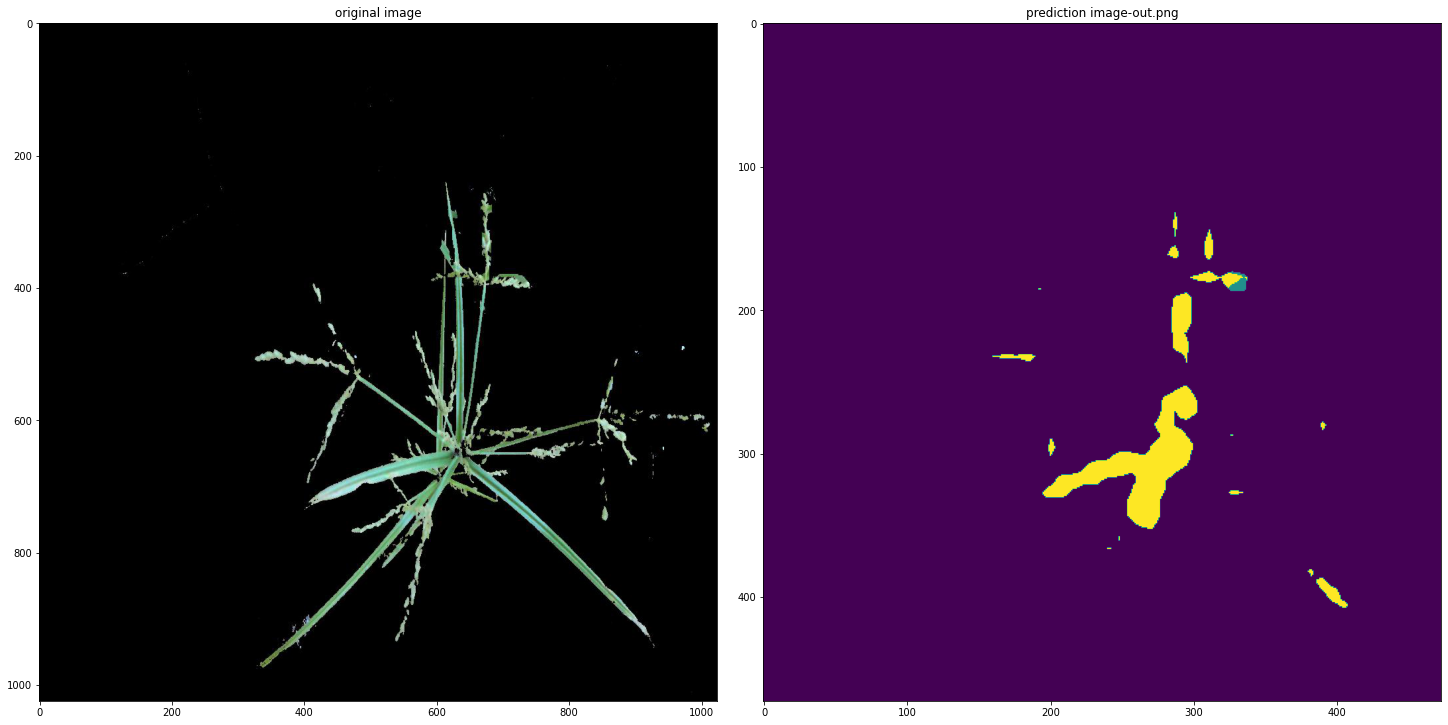

In [ ]:


input_image = "/content/drive/MyDrive/playment_bg_sd_only/validation/DSC04311sd.jpg"
out = new_model.predict_segmentation(
    inp=input_image,
    out_fname="mout11.png",overlay_img=True, show_legends=True,
    class_names = ["broadleaves","paddy","grass","sedges","background"]
)

fig, axs = plt.subplots(1, 2, figsize=(20, 20), constrained_layout=True)

img_orig = Image.open(input_image)
axs[0].imshow(img_orig)
axs[0].set_title('original image')
axs[0].grid(False)

axs[1].imshow(out)
axs[1].set_title('prediction image-out.png')
axs[1].grid(False)



**Broadleaves.Sedges and Paddy **

In [ ]:
print(new_model.evaluate_segmentation( inp_images_dir="/content/drive/MyDrive/playment_bg_sd_only/validation/orig"  , annotations_dir="/content/drive/MyDrive/playment_bg_sd_only/validation/anno" ) )

32it [00:10,  2.93it/s]

{'frequency_weighted_IU': 0.8954803341468532, 'mean_IU': 0.3573725341852393, 'class_wise_IU': array([0.94281126, 0.17170164, 0.29097291, 0.38137685, 0.        ])}


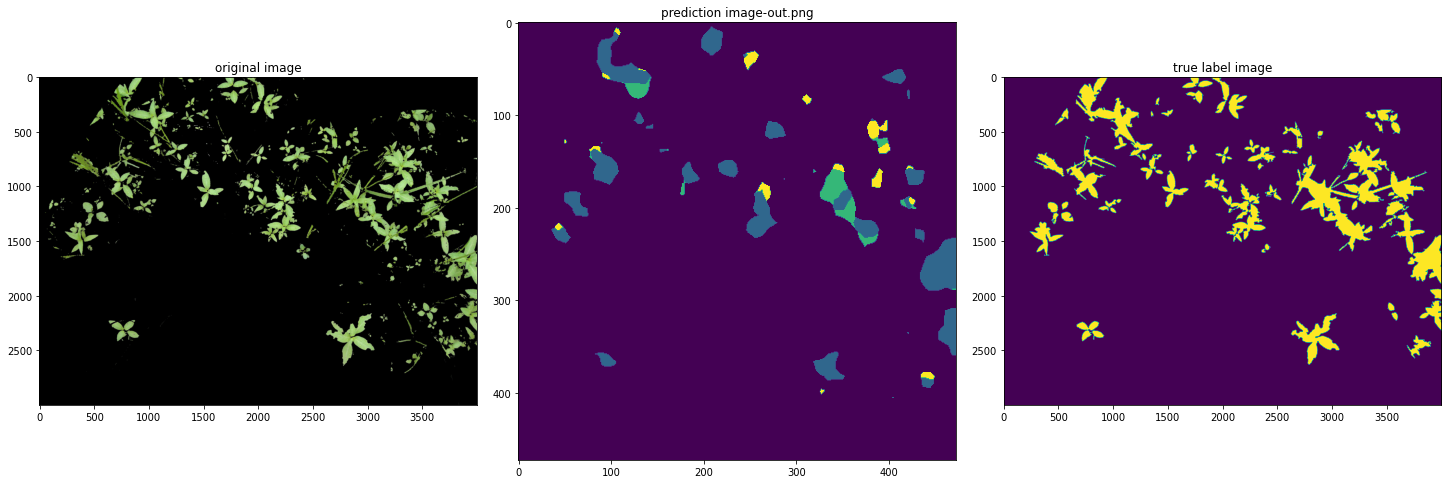

In [ ]:
input_image = "/content/drive/MyDrive/playment_bg_sd_only/validation/orig/DSC04342bl.jpg"
out = new_model.predict_segmentation(
    inp=input_image,
    out_fname="out4.png",overlay_img=True, show_legends=True,
    class_names = ["broadleaves","paddy","grass","sedges","background"]
)

fig, axs = plt.subplots(1, 3, figsize=(20, 20), constrained_layout=True)

img_orig = Image.open(input_image)
axs[0].imshow(img_orig)
axs[0].set_title('original image')
axs[0].grid(False)

axs[1].imshow(out)
axs[1].set_title('prediction image-out.png')
axs[1].grid(False)

validation_image = "/content/drive/MyDrive/playment_bg_sd_only/validation/anno/DSC04342bl.png"
axs[2].imshow( Image.open(validation_image))
axs[2].set_title('true label image')
axs[2].grid(False)

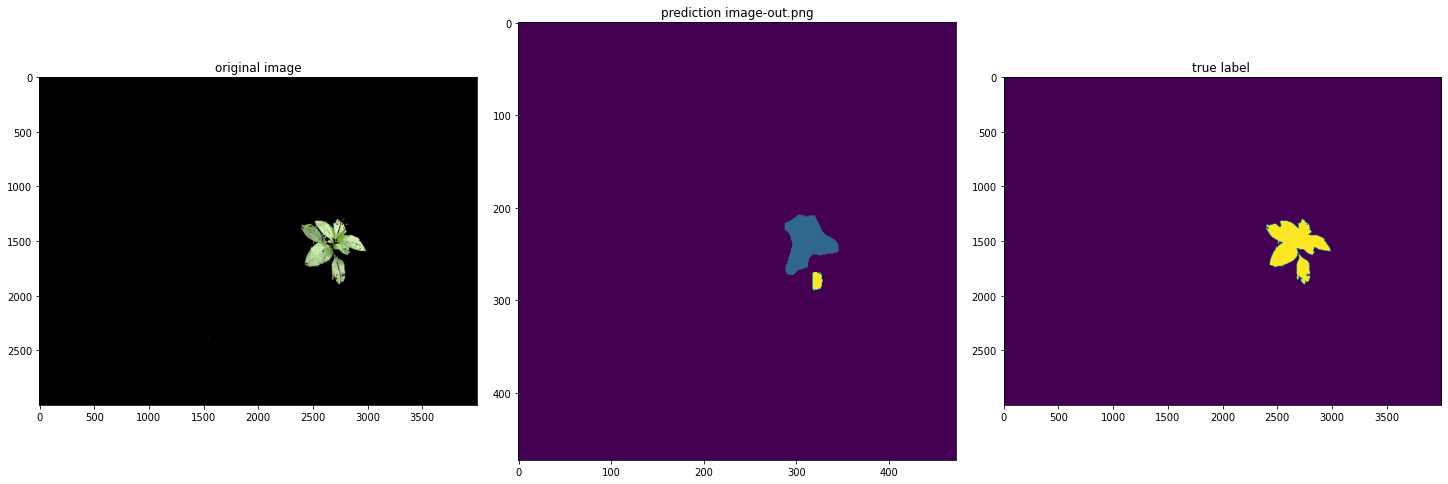

In [ ]:

input_image = "/content/drive/MyDrive/semantic_seg/validation/orig_img/DSC04044bl.jpg"
out = new_model.predict_segmentation(
    inp=input_image,
    out_fname="mout2.png"
)

fig, axs = plt.subplots(1, 3, figsize=(20, 20), constrained_layout=True)

img_orig = Image.open(input_image)
axs[0].imshow(img_orig)
axs[0].set_title('original image')
axs[0].grid(False)

axs[1].imshow(out)
axs[1].set_title('prediction image-out.png')
axs[1].grid(False)

validation_image = "/content/drive/MyDrive/semantic_seg/validation/annotated/DSC04044bl.png"
axs[2].imshow( Image.open(validation_image))
axs[2].set_title('true label ')
axs[2].grid(False)

#done = time.time()
#elapsed = done - start

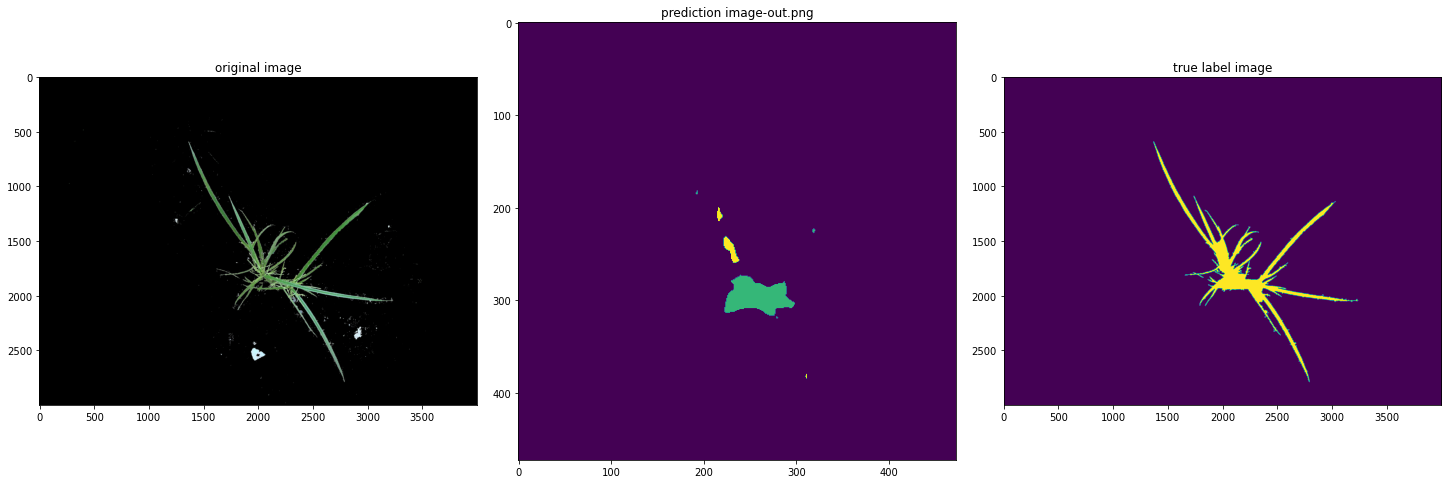

In [ ]:
input_image = "/content/drive/MyDrive/playment_bg_sd_only/validation/orig/DSC04090sd.jpg"
out = new_model.predict_segmentation(
    inp=input_image,
    out_fname="out2.png",overlay_img=True, show_legends=True,
    class_names = ["broadleaves","paddy","grass","sedges","background"]
)

fig, axs = plt.subplots(1, 3, figsize=(20, 20), constrained_layout=True)

img_orig = Image.open(input_image)
axs[0].imshow(img_orig)
axs[0].set_title('original image')
axs[0].grid(False)

axs[1].imshow(out)
axs[1].set_title('prediction image-out.png')
axs[1].grid(False)

validation_image = "/content/drive/MyDrive/playment_bg_sd_only/validation/anno/DSC04090sd.png"
axs[2].imshow( Image.open(validation_image))
axs[2].set_title('true label image')
axs[2].grid(False)

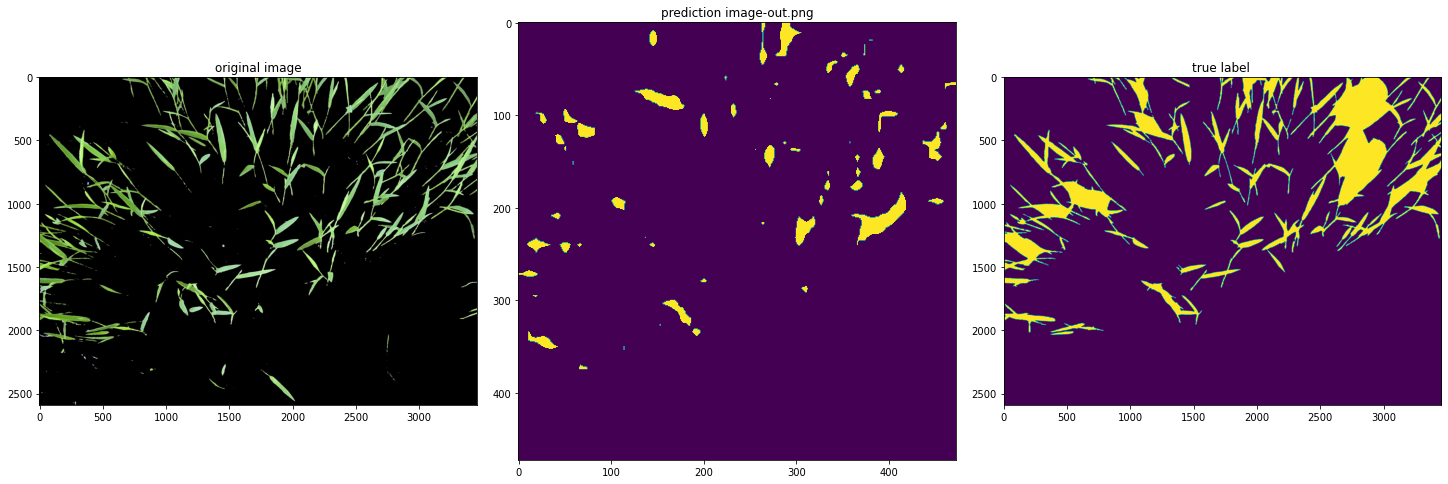

In [ ]:
input_image = "/content/drive/MyDrive/semantic_seg/validation/orig_img/IMG_4649pd.jpg"
out = new_model.predict_segmentation(
    inp=input_image,
    out_fname="m3out9.png"
)

fig, axs = plt.subplots(1, 3, figsize=(20, 20), constrained_layout=True)

img_orig = Image.open(input_image)
axs[0].imshow(img_orig)
axs[0].set_title('original image')
axs[0].grid(False)

axs[1].imshow(out)
axs[1].set_title('prediction image-out.png')
axs[1].grid(False)

validation_image = "/content/drive/MyDrive/semantic_seg/validation/annotated/IMG_4649pd.png"
axs[2].imshow( Image.open(validation_image))
axs[2].set_title('true label ')
axs[2].grid(False)

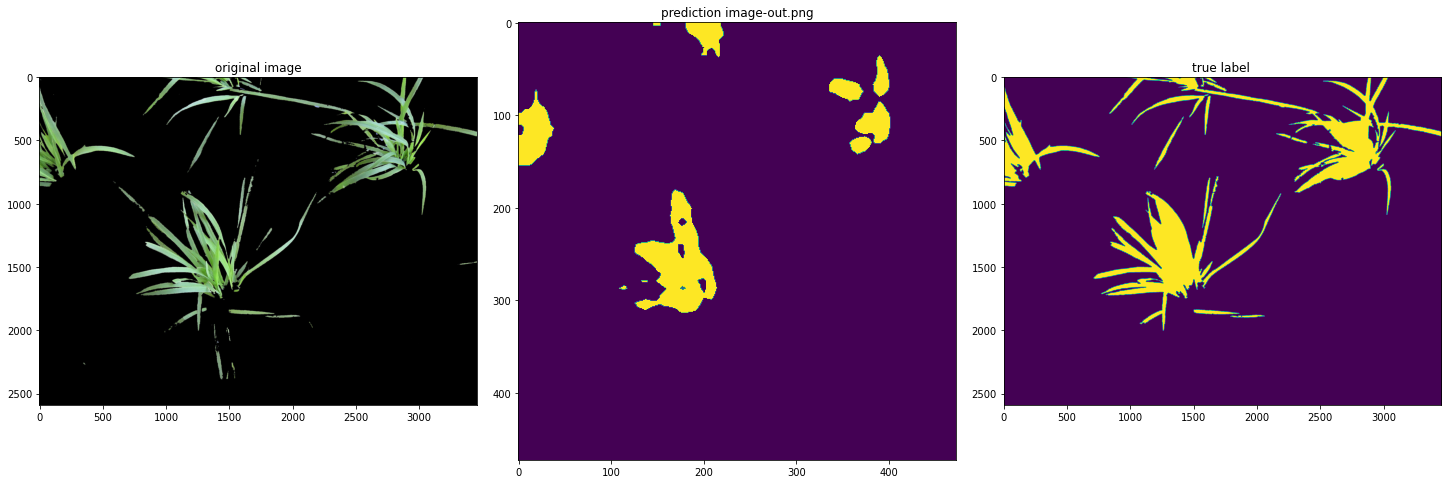

In [ ]:
input_image = "/content/drive/MyDrive/semantic_seg/validation/orig_img/IMG_4841pd.jpg"
out = new_model.predict_segmentation(
    inp=input_image,
    out_fname="m3out10.png",
    class_names = ["grass","broadleaves","paddy","sedges","bg"]
)

fig, axs = plt.subplots(1, 3, figsize=(20, 20), constrained_layout=True)

img_orig = Image.open(input_image)
axs[0].imshow(img_orig)
axs[0].set_title('original image')
axs[0].grid(False)

axs[1].imshow(out)
axs[1].set_title('prediction image-out.png')
axs[1].grid(False)

validation_image = "/content/drive/MyDrive/semantic_seg/validation/annotated/IMG_4841pd.png"
axs[2].imshow( Image.open(validation_image))
axs[2].set_title('true label ')
axs[2].grid(False)

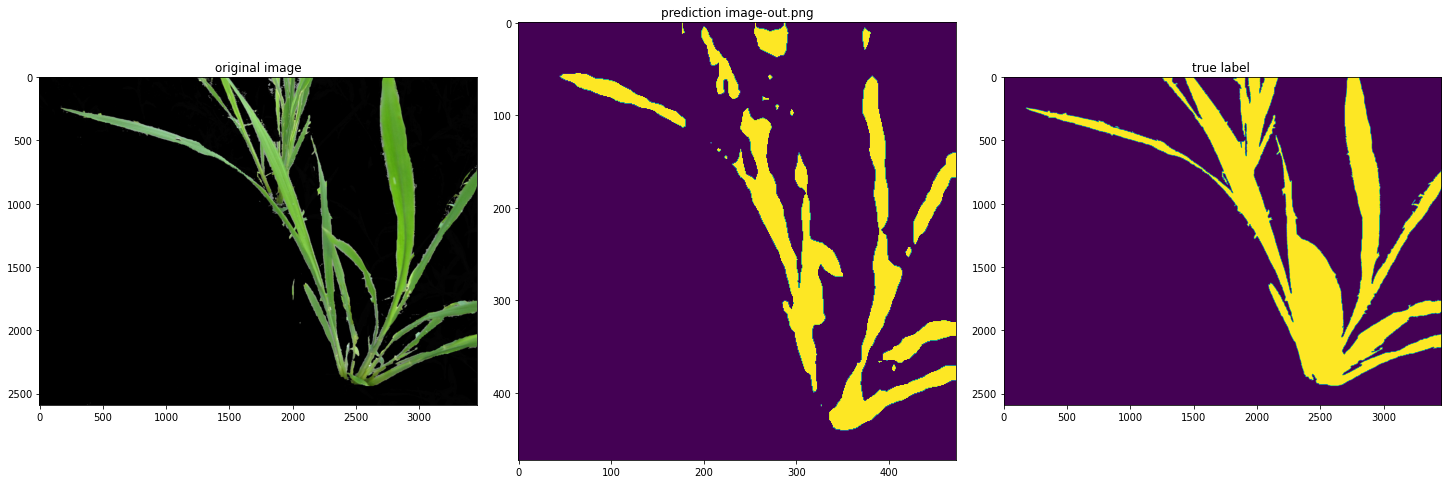

In [ ]:
input_image = "/content/drive/MyDrive/semantic_seg/validation/orig_img/IMG_5200pd.jpg"
out = new_model.predict_segmentation(
    inp=input_image,
    out_fname="m3out10.png",
    class_names = ["grass","broadleaves","paddy","sedges","bg"]
)

fig, axs = plt.subplots(1, 3, figsize=(20, 20), constrained_layout=True)

img_orig = Image.open(input_image)
axs[0].imshow(img_orig)
axs[0].set_title('original image')
axs[0].grid(False)

axs[1].imshow(out)
axs[1].set_title('prediction image-out.png')
axs[1].grid(False)

validation_image = "/content/drive/MyDrive/semantic_seg/validation/annotated/IMG_5200pd.png"
axs[2].imshow( Image.open(validation_image))
axs[2].set_title('true label ')
axs[2].grid(False)

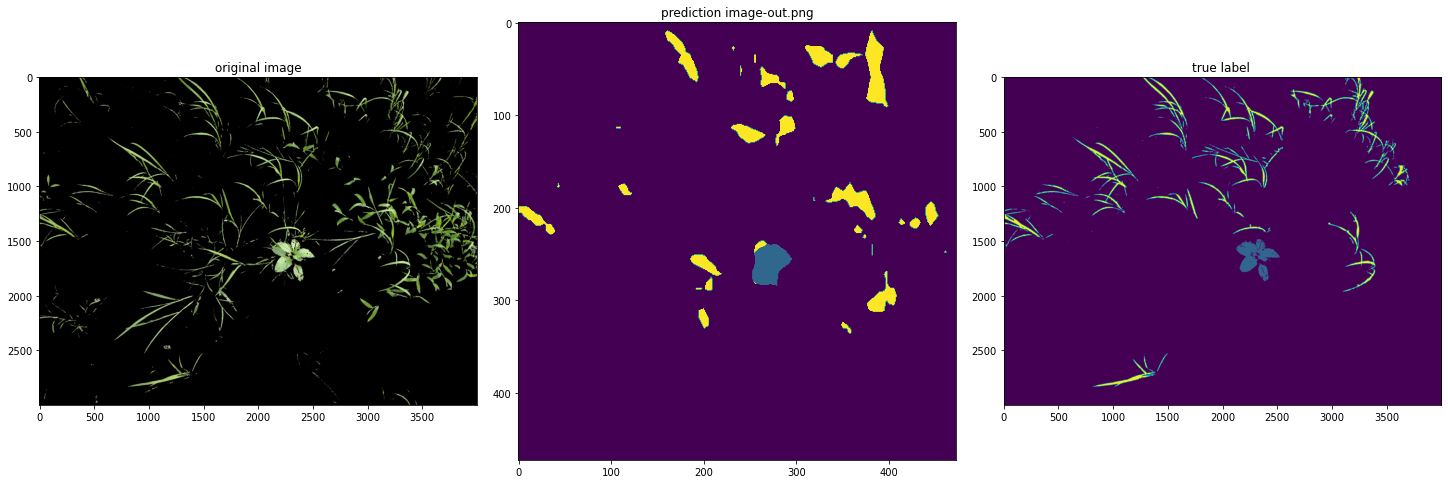

In [ ]:
input_image = "/content/drive/MyDrive/semantic_seg/validation/orig_img/DSC04049.jpg"
out = new_model.predict_segmentation(
    inp=input_image,
    out_fname="m3out10.png",
    class_names = ["grass","broadleaves","paddy","sedges","bg"]
)

fig, axs = plt.subplots(1, 3, figsize=(20, 20), constrained_layout=True)

img_orig = Image.open(input_image)
axs[0].imshow(img_orig)
axs[0].set_title('original image')
axs[0].grid(False)

axs[1].imshow(out)
axs[1].set_title('prediction image-out.png')
axs[1].grid(False)

validation_image = "/content/drive/MyDrive/semantic_seg/validation/annotated/DSC04049.png"
axs[2].imshow( Image.open(validation_image))
axs[2].set_title('true label ')
axs[2].grid(False)

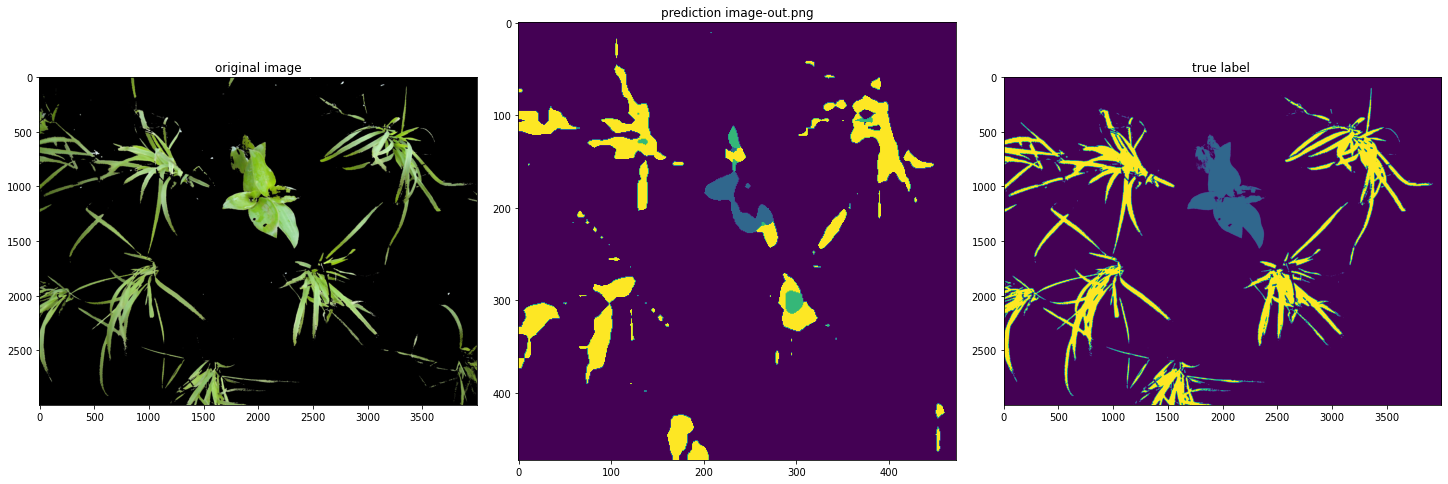

In [ ]:
input_image = "/content/drive/MyDrive/semantic_seg/validation/orig_img/DSC04135.jpg"
out = new_model.predict_segmentation(
    inp=input_image,
    out_fname="m3out10.png",
    class_names = ["grass","broadleaves","paddy","sedges","bg"]
)

fig, axs = plt.subplots(1, 3, figsize=(20, 20), constrained_layout=True)

img_orig = Image.open(input_image)
axs[0].imshow(img_orig)
axs[0].set_title('original image')
axs[0].grid(False)

axs[1].imshow(out)
axs[1].set_title('prediction image-out.png')
axs[1].grid(False)

validation_image = "/content/drive/MyDrive/semantic_seg/validation/annotated/DSC04135.png"
axs[2].imshow( Image.open(validation_image))
axs[2].set_title('true label ')
axs[2].grid(False)